In [3]:
# Categorizing and Tagging Words

from nltk import *

In [7]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [10]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'], end='')

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may', 'did', 'rose', 'made', 'does', 'expected', 'buy', 'take', 'get', 'might', 'sell', 'added', 'sold', 'help', 'including', 'should', 'reported', 'according', 'pay', 'compared', 'being', 'fell', 'began', 'based', 'used', 'closed', "'re", 'want', 'see', 'took', 'yield', 'offered', 'set', 'priced', 'approved', 'come', 'noted', 'cut', 'ended', 'found', 'increased', 'become', 'think', 'named', 'go', 'trying', 'proposed', 'received', 'growing', 'declined', 'held', 'give', 'came', 'use', 'put', 'making', 'continue', 'raise', 'estimated', 'called', 'paid', 'designed', 'going', 'expects', 'seeking', 'must', 'plans', 'wo', 'increasing', 'saying', 'got', 'owns', 'trading', 'acquired', 'gained', 'fined', 'reached', 'holding', 'announced', 'filed', 'became', 'seek', 'included', 'using', 'led', 'decided', 'keep', 'disclosed', 'agreed', 'find', 'failed', 'ru

In [11]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [27]:
brown_learned_text = nltk.corpus.brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))
brown_lrnd_tagged = nltk.corpus.brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [37]:
# from nltk.corpus import brown
# def process(sentence):
#     for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
#         if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
#             print(w1, w2, w3)
#
# for tagged_sent in brown.tagged_sents():
#     process(tagged_sent)

In [39]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

last_letters['zy']

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

In [45]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [52]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)
[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'),
('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'),
('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'),
('I', 'NN'), ('am', 'NN'), ('!', 'NN')]
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

In [55]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [58]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [59]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                              backoff=nltk.DefaultTagger('NN'))

In [62]:
# The Lookup tagger

def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

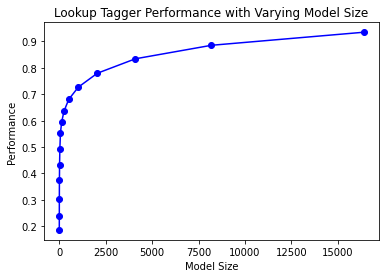

In [63]:
display()

In [65]:
# Unigram Tagging

from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])
[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'),
('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'),
(',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'),
('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'),
('direct', 'JJ'), ('.', '.')]
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [67]:
size = int(len(brown_tagged_sents) * 0.9)
size
4160
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

In [68]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593